## Genre classification with the Million Song Dataset

The [Million Song Dataset](http://labrosa.ee.columbia.edu/millionsong/) is a 

>  freely-available collection of audio features and metadata for a million contemporary popular music tracks

originally collected and compiled by Thierry Bertin-Mahieux, Daniel P.W. Ellis, Brian Whitman, and Paul Lamere.

The dataset is intended to encourage development of algorithms in the field of [music information retrieval](https://en.wikipedia.org/wiki/Music_information_retrieval). The [data for each track](http://labrosa.ee.columbia.edu/millionsong/pages/example-track-description) includes both textual features such as artist and album names, numerical descriptors such as duration and various audio features derived using a music analysis platform provided by [The Echo Nest](https://en.wikipedia.org/wiki/The_Echo_Nest) (since acquired by Spotify). Of the various audio features and segmentations included in the full dataset, the most detailed information is included at a 'segment' level: each segment corresponds to an automatically identified 'quasi-stable music event' - roughly contiguous sections of the audio with similar perceptual quality. The number of segments per track is variable and each segment can itself be of variable length - typically they seem to be around 0.2 - 0.4 seconds but can be as long as 10 seconds or more. 

For each segment of the track various extracted audio features are available - a 12 dimensional vector of [chroma features](https://en.wikipedia.org/wiki/Chroma_feature), a 12 dimensional vector of ['MFCC-like'](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) timbre features and various measures of the loudness of the segment, including loudness at the segment start and maximum loudness.

#### EACH SEGMENT IS REPRESENTED BY THIS:
In the version of the data we provide, we include a 25 dimensional vector for each included segment, consisting of the 12 timbre features, 12 chroma features and loudness at start of segment concatenated in that order.

#### FEEDFORWARD
To allow easier integration in to standard feedforward models, the basic version of the data we provide includes features only for a fixed length crop of the central 120 segments of each track (with tracks with less than 120 segments therefore not being included).  
This gives an overall input dimension per track of 120×25=3000.

#### ALREADY NORMALIZED
Each of the 3000 input dimensions has been been preprocessed by subtracting the per-dimension mean across the training data and dividing by the per-dimension standard deviation across the training data.

We provide data providers for the fixed length crops versions of the input features, with the inputs being returned in batches of 3000 dimensional vectors (these can be reshaped to (120, 25) to get the per-segment features). To allow for more complex variable-length sequence modelling with for example recurrent neural networks, we also provide a variable length version of the data. This is only provided as compressed NumPy (`.npz`) data files rather than data provider objects - you will need to write your own data provider if you wish to use this version of the data. As the inputs are of variable number of segments they have been ['bucketed'](https://www.tensorflow.org/tutorials/seq2seq/#bucketing_and_padding) into groups of similar maximum length, with the following binning scheme used:

     120 - 250  segments
     251 - 500  segments
     501 - 650  segments
     651 - 800  segments
     801 - 950  segments
     951 - 1200 segments
    1201 - 2000 segments
    2000 - 4000 segments
    
For each bucket the NumPy data files include inputs and targets arrays with second dimension equal to the maximum segment size in the bucket (e.g. 250 for the bucket) and first dimension equal to the number of tracks with number of segments in that bucket. These are named `inputs_{n}` and `targets_{n}` in the data file where `{n}` is the maximal number of segments in the bucket e.g. `inputs_250` and `targets_250` for the first bucket. For tracks with less segments than the maximum size in the bucket, the features for the track have been padded with `NaN` values. For tracks with more segments than the maximum bucket size of 4000, only the first 4000 segments have been included.

To allow you to match tracks between the fixed length and variable length datasets, the data files also include an array for each bucket giving the indices of the corresponding track in the fixed length input arrays. For example the array `indices_250` will be an array of the same size as the first dimension of `inputs_250` and `targets_250` with the first element of `indices_250` giving the index into the `inputs` and `targets` array of the fixed length data corresponding to first element of `inputs_250` and `targets_250`.

The Million Song Dataset in its original form does not provide any genre labels, however various external groups have proposed genre labels for portions of the data by cross-referencing the track IDs against external music tagging databases. Analagously to the provision of both simpler and more complex classifications tasks for the CIFAR-10 / CIFAR-100 datasets, we provide two classification task datasets derived from the Million Song Dataset - one with 10 coarser level genre classes, and another with 25 finer-grained genre / style classifications.

The 10-genre classification task uses the [*CD2C tagtraum genre annotations*](http://www.tagtraum.com/msd_genre_datasets.html) derived from multiple source databases (beaTunes genre dataset, Last.fm dataset, Top-MAGD dataset), with the *CD2C* variant using only non-ambiguous annotations (i.e. not including tracks with multiple genre labels). Of the 15 genre labels provided in the CD2C annotations, 5 (World, Latin, Punk, Folk and New Age) were not included due to having fewer than 5000 examples available. This left 10 remaining genre classes:

    Rap
    Rock
    RnB
    Electronic
    Metal
    Blues
    Pop
    Jazz
    Country
    Reggae

For each of these 10 classes, 5000 labelled examples have been collected for training / validation (i.e. 50000 example in total) and a further 1000 example per class for testing, with the exception of the `Blues` class for which only 991 testing examples are provided due to there being insufficient labelled tracks of the minimum required length (i.e. a total of 9991 test examples). 

The 9991 test set examples have labels provided: however to avoid any accidental over-fitting to the test set **you should only use these for the final evaluation of your model(s)**. If you repeatedly evaluate models on the test set during model development it is easy to end up indirectly fitting to the test labels - for those who have not already read it see this [excellent cautionary note int the MLPR notes by Iain Murray](http://www.inf.ed.ac.uk/teaching/courses/mlpr/2016/notes/w2a_train_test_val.html#warning-dont-fool-yourself-or-make-a-fool-of-yourself). 


The 25-genre classification tasks uses the [*MSD Allmusic Style Dataset*](http://www.ifs.tuwien.ac.at/mir/msd/MASD.html) labels derived from the [AllMusic.com](http://www.allmusic.com/) database by [Alexander Schindler, Rudolf Mayer and Andreas Rauber of Vienna University of Technology](http://www.ifs.tuwien.ac.at/~schindler/pubs/ISMIR2012.pdf). The 25 genre / style labels used are:

    Big Band
    Blues Contemporary
    Country Traditional
    Dance
    Electronica
    Experimental
    Folk International
    Gospel
    Grunge Emo
    Hip Hop Rap
    Jazz Classic
    Metal Alternative
    Metal Death
    Metal Heavy
    Pop Contemporary
    Pop Indie
    Pop Latin
    Punk
    Reggae
    RnB Soul
    Rock Alternative
    Rock College
    Rock Contemporary
    Rock Hard
    Rock Neo Psychedelia
    
For each of these 25 classes, 2000 labelled examples have been collected for training / validation (i.e. 50000 example in total). A further 400 example per class have been collected for testing (i.e. 10000 examples in total), which you are provided inputs but not targets for. The optional Kaggle competition being run for this dataset (see email) is scored based on the 25-genre class label predictions on these unlabelled test inputs. 

The tracks used for the 25-genre classification task only partially overlap with those used for the 10-genre classification task and we do not provide any mapping between the two.

For each of the two tasks, the 50000 examples collected for training have been pre-split in to a 40000 example training dataset and a 10000 example validation dataset. If you wish to use a more complex cross-fold validation scheme you may want to combine these two portions of the dataset and define your own functions / classes for separating out a validation set.

Data provider classes for both fixed length input data for the 10 and 25 genre classification tasks in the `mlp.data_providers` module as `MSD10GenreDataProvider` and `MSD25GenreDataProvider`. Both have similar behaviour to the `MNISTDataProvider` used extensively last semester. A `which_set` argument can be used to specify whether to return a data provided for the training dataset (`which_set='train'`) or validation dataset (`which_set='valid'`).  Both data provider classes provide a `label_map` attribute which is a list of strings which are the class labels corresponding to the integer targets (i.e. prior to conversion to a 1-of-K encoded binary vector).

The test dataset files for the 10 genre classification task are provided as two separate NumPy data files `msd-10-genre-test-inputs.npz` and `msd-10-genre-test-targets.npz`. These can be loaded using [`np.load`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html) function. The inputs are stored as a $10000\times3000$ array under the key `inputs` in the file `msd-10-genre-test-inputs.npz` and the targets in a 10000 element array of integer labels under the key `targets` in `msd-10-genre-test-targets.npz`. A corresponding `msd-25-genre-test-inputs.npz` file is provided for the 25 genre task inputs.

### Accessing the Million Song Dataset data

Before using the data provider objects you will need to make sure the data files are accessible to the `mlp` package by existing under the directory specified by the `MLP_DATA_DIR` path.

The fixed length input data and associated targets is available as compressed NumPy `.npz` files

    msd-10-genre-train.npz          210MB
    msd-10-genre-valid.npz           53MB
    msd-10-genre-test-inputs.npz     53MB
    msd-10-genre-test-targets.npz   5.2KB
    msd-25-genre-train.npz          210MB
    msd-25-genre-valid.npz           53MB
    msd-25-genre-test-inputs.npz     53MB

in the AFS directory `/afs/inf.ed.ac.uk/group/teaching/mlp/data`.

If you are working on DICE one option is to redefine your `MLP_DATA_DIR` to directly point to the shared AFS data directory by editing the `env_vars.sh` start up file for your environment. This will avoid using up your DICE quota by storing the data files in your homespace but may involve slower initial loading of the data on initialising the data providers if many people are trying access the same files at once. The environment variable can be redefined by running

```
gedit ~/miniconda2/envs/mlp/etc/conda/activate.d/env_vars.sh
```

in a terminal window (assuming you installed `miniconda2` to your home directory), and changing the line

```
export MLP_DATA_DIR=$HOME/mlpractical/data
```

to

```
export MLP_DATA_DIR="/afs/inf.ed.ac.uk/group/teaching/mlp/data"
```

and then saving and closing the editor. You will need reload the `mlp` environment using `source activate mlp` and restart the Jupyter notebook server in the reloaded environment for the new environment variable definition to be available.

For those working on DICE who have sufficient quota remaining or those using there own machine, an alternative option is to copy the data files in to your local `mlp/data` directory (or wherever your `MLP_DATA_DIR` environment variable currently points to if different). 


Assuming your local `mlpractical` repository is in your home directory you should be able to copy the required files on DICE by running

```
cp /afs/inf.ed.ac.uk/group/teaching/mlp/data/msd-*-train.npz ~/mlpractical/data
cp /afs/inf.ed.ac.uk/group/teaching/mlp/data/msd-*-valid.npz ~/mlpractical/data
cp /afs/inf.ed.ac.uk/group/teaching/mlp/data/msd-*-test-*.npz ~/mlpractical/data
```

On a non-DICE machine, you will need to either [set up local access to AFS](http://computing.help.inf.ed.ac.uk/informatics-filesystem), use a remote file transfer client like `scp` or you can alternatively download the files using the iFile web interface [here](https://ifile.inf.ed.ac.uk/?path=%2Fafs%2Finf.ed.ac.uk%2Fgroup%2Fteaching%2Fmlp%2Fdata&goChange=Go) (requires DICE credentials).

As some of the files are quite large you may wish to copy only those you are using (e.g. only the files for one of the two tasks) to your local filespace to avoid filling up your quota. The `msd-25-genre-test-inputs.npz` files will only be needed by those intending to enter the associated optional Kaggle competition.

In addition to the fixed length input files there are also corresponding files with the variable length input data in the same AFS directory

    msd-10-genre-train-var-length.npz          1.6GB
    msd-10-genre-valid-var-length.npz          403MB
    msd-10-genre-test-inputs-var-length.npz    403MB
    msd-10-genre-test-targets-var-length.npz   3.1KB
    msd-25-genre-train-var-length.npz          1.5GB
    msd-25-genre-valid-var-length.npz          367MB
    msd-25-genre-test-inputs-var-length.npz    363MB
    
As you can see some of these files, particularly the training sets, are very large so you will need to be careful if copying to your filespace to make sure you have sufficient quota available.

### Imports, Inits, and helper functions

In [1]:
import sys
mlpdir = '/home/student/Dropbox/msc_Artificial_Intelligence/mlp_Machine_Learning_Practical/mlpractical'
sys.path.append(mlpdir)

In [2]:
from mylibs.jupyter_notebook_helper import show_graph
import datetime
import os
import time
import tensorflow as tf
import numpy as np
from mlp.data_providers import MSD10GenreDataProvider, MSD25GenreDataProvider, MSD10Genre_Autoencoder_DataProvider,\
    MSD10Genre_StackedAutoEncoderDataProvider
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
seed = 16011984
rng = np.random.RandomState(seed=seed)

In [4]:
config = tf.ConfigProto(log_device_placement=True, allow_soft_placement=True)
config.gpu_options.allow_growth = True

In [5]:
figcount = 0

In [6]:
tensorboardLogdir = 'tf_cw3_4'

In [7]:
def getRunTime(function): #a = lambda _ = None : 3
    run_start_time = time.time()
    result = function()
    run_time = time.time() - run_start_time
    return result, run_time

In [8]:
def getNewSessionInitialized(graph=tf.get_default_graph()):
    #with graph.as_default():
    sess = tf.InteractiveSession(graph=graph)
    #sess = tf.Session(graph=graph)
    sess.run(tf.global_variables_initializer())
        
    return sess

In [9]:
def getWriter(key, graph):
    #tensorboard --logdir=...
    folder = tensorboardLogdir

    timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    return tf.summary.FileWriter(
        logdir=os.path.join(folder, timestamp, key),
        graph=graph
    )

In [10]:
def getTrainWriter():
    return getWriter('train', tf.get_default_graph())

In [11]:
def getValidWriter():
    return getWriter('valid', tf.get_default_graph())

In [12]:
def plotStats(stats, keys, stats_interval):
    # Plot the change in the validation and training set error over training.
    
    #stats[0:, keys[k]] #0 epoch number
    #stats[1:, keys[k]] #1 for training and validation
    #keys is from string to index
    #stats shape is [epochs, 4]
    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return fig_1, ax_1, fig_2, ax_2

In [13]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.relu, avoidDeadNeurons=0.,
                          w=None, b=None):
    weights = tf.Variable(
        tf.truncated_normal([input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5) if w is None else w,
            'weights'
    )
    
    biases = tf.Variable(avoidDeadNeurons * tf.ones([output_dim]) if b is None else b, 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

In [14]:
def tfRMSE(outputs, targets):
    return tf.sqrt(tf.reduce_mean(tf.square(tf.sub(targets, outputs))))

In [15]:
def tfMSE(outputs, targets):
    return tf.reduce_mean(tf.square(tf.sub(targets, outputs)))

In [16]:
def initStats():
    stats = np.zeros( (epochs,4) )
    
    keys = {
        'error(train)': 0,
        'acc(train)': 1,
        'error(valid)': 2,
        'acc(valid)': 3
    }

    return stats, keys

In [17]:
def gatherStats(e, train_error, train_accuracy, valid_error, valid_accuracy):
    stats[e, 0] = train_error
    stats[e, 1] = train_accuracy
    stats[e, 2] = valid_error
    stats[e, 3] = valid_accuracy

In [18]:
def merge_dicts(*dict_args):
    """
    Given any number of dicts, shallow copy and merge into a new dict,
    precedence goes to key value pairs in latter dicts.
    """
    result = {}
    for dictionary in dict_args:
        result.update(dictionary)
    return result

In [19]:
curDtype = tf.float32

In [20]:
reluBias = 0.1

In [21]:
def trainEpoch(e, train_data, train_step, error, accuracy, extraFeedDict):
    train_error = 0.
    train_accuracy = 0.
    
    num_batches = train_data.num_batches
    
    for step, (input_batch, target_batch) in enumerate(train_data):
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict= merge_dicts({inputs: input_batch, targets: target_batch}, extraFeedDict)
        )
        
        train_error += batch_error
        train_accuracy += batch_acc
    
    train_error /= num_batches
    
    train_accuracy /= num_batches
    
    return train_error, train_accuracy

In [22]:
def validateEpoch(e, valid_data, error, accuracy, keep_prob_keys = [], extraFeedDict={}):
    valid_error = 0.
    valid_accuracy = 0.
    
    num_batches = valid_data.num_batches
    
    validationKeepProbability = 1. #it is always 100% for validation
    
    keep_prob_dict = dict()
    
    for keep_prob_key in keep_prob_keys:
        keep_prob_dict[keep_prob_key] = validationKeepProbability

    for step, (input_batch, target_batch) in enumerate(valid_data):
        batch_error, batch_acc = sess.run(
            [error, accuracy], 
            feed_dict= merge_dicts({inputs: input_batch, targets: target_batch}, keep_prob_dict, extraFeedDict)
        )
            
        valid_error += batch_error
        valid_accuracy += batch_acc

    valid_error /= valid_data.num_batches
    valid_accuracy /= valid_data.num_batches
    
    return valid_error, valid_accuracy

In [23]:
def batchNormWrapper_byExponentialMovingAvg(bnId, ins, training, epsilon = 1e-3):
    outputDim = ins.get_shape()[-1]
    
    pop_mean = tf.Variable(tf.zeros(outputDim), trainable=False, name='pm%d' % bnId)
    pop_var = tf.Variable(tf.ones(outputDim), trainable=False, name='pv%d' % bnId)
    
    beta_offset = tf.Variable(tf.zeros(outputDim), name='bo%d' % bnId)    
    scale_gamma = tf.Variable(tf.ones(outputDim), name='sg%d' % bnId)
    
    #given that on axis=0 is where the batches extend (we want mean and var for each attribute)
    batch_mean, batch_var = tf.nn.moments(ins,[0])
    
    decay = 0.999 # use numbers closer to 1 if you have more data
    mean_of_train = tf.assign(pop_mean, pop_mean * decay + batch_mean * (1 - decay)) #we just want to use the 
    var_of_train = tf.assign(pop_var, pop_var * decay + batch_var * (1 - decay))
    
    with tf.control_dependencies([mean_of_train, var_of_train]):
        normalized = tf.nn.batch_normalization(ins,
                                               tf.cond(training, lambda: batch_mean, lambda: pop_mean),
                                               tf.cond(training, lambda: batch_var, lambda: pop_var),
                                               beta_offset, scale_gamma, epsilon)

    return normalized

In [24]:
def fully_connected_layer_with_batch_norm(fcId, inputs, input_dim, output_dim, training, nonlinearity=tf.nn.relu, avoidDeadNeurons=0.,
                          w=None, b=None):
    weights = tf.Variable(
        tf.truncated_normal([input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5) if w is None else w,
            name = 'weights%d' % fcId
    )
    
    biases = tf.Variable(avoidDeadNeurons * tf.ones([output_dim]) if b is None else b, name = 'biases%d' % fcId)
    
    out_affine = tf.matmul(inputs, weights) + biases
    
    batchNorm = batchNormWrapper_byExponentialMovingAvg(fcId, out_affine, training)
    
    outputs = nonlinearity(batchNorm)
    return outputs

In [25]:
#lamda2 * tf.nn.l2_loss(w1)
def fully_connected_layer_with_batch_norm_and_l2(fcId, inputs, input_dim, output_dim,
                                                 training, lamda2, nonlinearity=tf.nn.relu,
                                                 avoidDeadNeurons=0.,
                                                 w=None, b=None):
    weights = tf.Variable(
        tf.truncated_normal([input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5) if w is None else w,
            name = 'weights%d' % fcId
    )
    
    regularizer = lamda2 * tf.nn.l2_loss(weights)
    
    biases = tf.Variable(avoidDeadNeurons * tf.ones([output_dim]) if b is None else b, name = 'biases%d' % fcId)
    
    out_affine = tf.matmul(inputs, weights) + biases
    
    batchNorm = batchNormWrapper_byExponentialMovingAvg(fcId, out_affine, training)
    
    outputs = nonlinearity(batchNorm)
    
    return outputs, regularizer

In [26]:
modelVars = np.load('pretrainedModelVars.npz')
modelVars = modelVars[modelVars.keys()[0]]

### MSD 10 genre task

### Does pretraining help the deeper neural network used above?

In [26]:
hidden_dims = np.linspace(1000, 25, 6).astype(int)
hidden_dims

array([1000,  805,  610,  415,  220,   25])

In [27]:
train_data = MSD10GenreDataProvider('train', batch_size=50, rng=rng) #((50, 3000), (50, 10))
valid_data = MSD10GenreDataProvider('valid', batch_size=50, rng=rng)

In [28]:
print hidden_dims

#tf.reset_default_graph() #kind of redundant statement
learningRate = 1e-3 #default of Adam is 1e-3

graph = tf.Graph() #create new graph

hidden_layers = []

with graph.as_default():
    inputs = tf.placeholder(curDtype, [None, train_data.inputs.shape[1]], 'inputs')
    targets = tf.placeholder(curDtype, [None, train_data.num_classes], 'targets')
    
    with tf.name_scope('fullyConnected0'):
        hidden_layers.append(
            fully_connected_layer(inputs, train_data.inputs.shape[1], hidden_dims[0], nonlinearity= tf.nn.tanh,
                                 w = modelVars[0][0], b = modelVars[0][1])
        )
    
    
    #for i, hidden_dim in enumerate(hidden_dims):
    for i in range(1, len(hidden_dims)):
        with tf.name_scope('fullyConnected%d' % i):
            hidden_layers.append(
                fully_connected_layer(hidden_layers[i-1],
                                      hidden_dims[i-1], hidden_dims[i],
                                      nonlinearity= tf.nn.tanh,
                                     w=modelVars[i][0], b=modelVars[i][1])
            )
            

    with tf.name_scope('readout_output_layer'):
        outputs = fully_connected_layer(hidden_layers[-1],
                                        hidden_dims[-1], train_data.num_classes,
                                        nonlinearity=tf.identity)

    with tf.name_scope('error'):
        error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))

    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), dtype=curDtype))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer(learning_rate=learningRate).minimize(error)

    init = tf.global_variables_initializer()

[1000  805  610  415  220   25]


In [31]:
#show_graph(graph)

End epoch 01 (25.891 secs): err(train)=1.73, acc(train)=0.40, err(valid)=1.68, acc(valid)=0.41, 
End epoch 02 (24.754 secs): err(train)=1.55, acc(train)=0.46, err(valid)=1.64, acc(valid)=0.43, 
End epoch 03 (24.693 secs): err(train)=1.44, acc(train)=0.50, err(valid)=1.62, acc(valid)=0.44, 
End epoch 04 (24.688 secs): err(train)=1.34, acc(train)=0.54, err(valid)=1.62, acc(valid)=0.45, 
End epoch 05 (24.645 secs): err(train)=1.24, acc(train)=0.58, err(valid)=1.66, acc(valid)=0.45, 
End epoch 06 (24.662 secs): err(train)=1.14, acc(train)=0.62, err(valid)=1.72, acc(valid)=0.44, 
End epoch 07 (24.705 secs): err(train)=1.03, acc(train)=0.66, err(valid)=1.78, acc(valid)=0.44, 
End epoch 08 (24.668 secs): err(train)=0.95, acc(train)=0.69, err(valid)=1.83, acc(valid)=0.43, 
End epoch 09 (24.674 secs): err(train)=0.87, acc(train)=0.72, err(valid)=1.91, acc(valid)=0.44, 
End epoch 10 (24.638 secs): err(train)=0.81, acc(train)=0.74, err(valid)=1.93, acc(valid)=0.44, 
End epoch 11 (25.436 secs): er

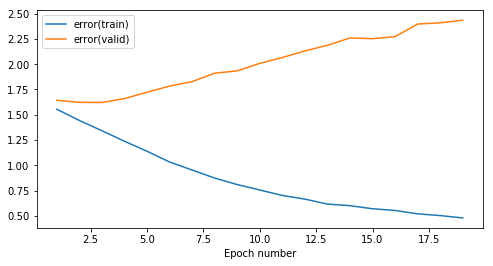

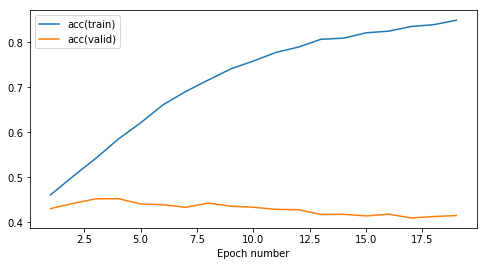

In [59]:
%%time

epochs = 20

# keep_prob_values = [0.9, 0.6, 0.6, 0.6, 0.6]
# assert len(keep_probs) == len(keep_prob_values)
keep_prob_dict = dict()
# for i, keep_prob_key in enumerate(keep_probs):
#     keep_prob_dict[keep_prob_key] = keep_prob_values[i]

with tf.Session(graph=graph, config=config) as sess:
    sess.run(init)

    stats, keys = initStats()

    for e in range(epochs):
        (train_error, train_accuracy), runTime = getRunTime(lambda _ = None: 
                trainEpoch(e, train_data, train_step, error, accuracy,
                    extraFeedDict= keep_prob_dict
            ))
        
        #print 'End epoch %02d (%.3f secs): err(train)=%.2f acc(train)=%.2f' % (e+1, runTime, train_error,train_accuracy)

        if (e + 1) % 1 == 0:
            valid_error, valid_accuracy = validateEpoch(e, valid_data, error, accuracy)

            #print((' ' * 27) + 'err(valid)={0:.2f} acc(valid)={1:.2f}'.format(valid_error, valid_accuracy))

        print 'End epoch %02d (%.3f secs): err(train)=%.2f, acc(train)=%.2f, err(valid)=%.2f, acc(valid)=%.2f, ' %\
            (e+1, runTime, train_error, train_accuracy, valid_error, valid_accuracy)
        
        gatherStats(e, train_error, train_accuracy, valid_error, valid_accuracy)

fig_1, ax_1, fig_2, ax_2 = plotStats(stats, keys, stats_interval=1)
figcount += 1
fig_1.savefig('cw3_part4_%02d_fig_error.svg' % figcount)
fig_2.savefig('cw3_part4_%02d_fig_valid.svg' % figcount)

#### Conclusion
With the current architecture the result is that we have a slower learning rate than before and the effect of overfitting is still apparent as it is expected.

Before try to tackle the overfitting effect we will use batch normalization in order to try and derive a faster learning rate

### Is Batchnormalization helpful in increasing the learning rate of our Deep Neural Network?

In [32]:
train_data = MSD10GenreDataProvider('train', batch_size=50, rng=rng) #((50, 3000), (50, 10))
valid_data = MSD10GenreDataProvider('valid', batch_size=50, rng=rng)

In [61]:
hidden_dims = np.linspace(1000, 25, 6).astype(int)
print hidden_dims

#tf.reset_default_graph() #kind of redundant statement
learningRate = 1e-3 #default of Adam is 1e-3

graph = tf.Graph() #create new graph

hidden_layers = []

with graph.as_default():
    with tf.name_scope('data'):
        inputs = tf.placeholder(curDtype, [None, train_data.inputs.shape[1]], 'inputs')
        targets = tf.placeholder(curDtype, [None, train_data.num_classes], 'targets')
    
    with tf.name_scope('params'):
        training = tf.placeholder(tf.bool, name="training")
    
    with tf.name_scope('fullyConnected0'):
        hidden_layers.append(
            fully_connected_layer_with_batch_norm(0, inputs,
                                                  train_data.inputs.shape[1], hidden_dims[0],
                                                  nonlinearity= tf.nn.tanh,
                                                  training=training,
                                                  w = modelVars[0][0], b = modelVars[0][1])
        )
    
    
    for i in range(1, len(hidden_dims)):
        with tf.name_scope('fullyConnected%d' % i):
            hidden_layers.append(
                fully_connected_layer_with_batch_norm(i, hidden_layers[i-1],
                                      hidden_dims[i-1], hidden_dims[i],
                                      nonlinearity= tf.nn.tanh,
                                      training=training,
                                      w=modelVars[i][0], b=modelVars[i][1])
            )
            

    with tf.name_scope('readout_output_layer'):
        outputs = fully_connected_layer_with_batch_norm(len(hidden_dims), hidden_layers[-1],
                                        hidden_dims[-1], train_data.num_classes,
                                        training=training,
                                        nonlinearity=tf.identity)

    with tf.name_scope('error'):
        error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))

    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), dtype=curDtype))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer(learning_rate=learningRate).minimize(error)

    init = tf.global_variables_initializer()

[1000  805  610  415  220   25]


In [34]:
#show_graph(graph)

End epoch 01 (29.329 secs): err(train)=1.70, acc(train)=0.41, err(valid)=1.63, acc(valid)=0.43, 
End epoch 02 (29.171 secs): err(train)=1.55, acc(train)=0.46, err(valid)=1.61, acc(valid)=0.44, 
End epoch 03 (29.088 secs): err(train)=1.46, acc(train)=0.50, err(valid)=1.57, acc(valid)=0.45, 
End epoch 04 (29.130 secs): err(train)=1.37, acc(train)=0.53, err(valid)=1.61, acc(valid)=0.45, 
End epoch 05 (31.452 secs): err(train)=1.29, acc(train)=0.56, err(valid)=1.60, acc(valid)=0.46, 
End epoch 06 (29.043 secs): err(train)=1.17, acc(train)=0.61, err(valid)=1.67, acc(valid)=0.45, 
End epoch 07 (29.116 secs): err(train)=1.03, acc(train)=0.66, err(valid)=1.78, acc(valid)=0.44, 
End epoch 08 (29.066 secs): err(train)=0.86, acc(train)=0.72, err(valid)=1.88, acc(valid)=0.45, 
End epoch 09 (29.032 secs): err(train)=0.69, acc(train)=0.78, err(valid)=2.02, acc(valid)=0.43, 
End epoch 10 (29.085 secs): err(train)=0.54, acc(train)=0.83, err(valid)=2.20, acc(valid)=0.42, 
End epoch 11 (29.042 secs): er

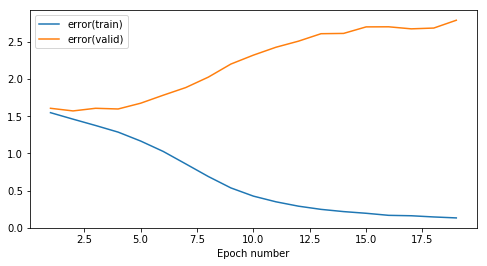

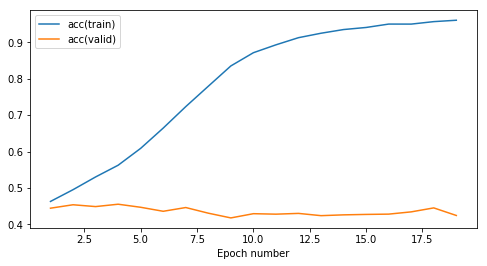

In [63]:
%%time

epochs = 20

# keep_prob_values = [0.9, 0.6, 0.6, 0.6, 0.6]
# assert len(keep_probs) == len(keep_prob_values)
keep_prob_dict = dict()
# for i, keep_prob_key in enumerate(keep_probs):
#     keep_prob_dict[keep_prob_key] = keep_prob_values[i]

with tf.Session(graph=graph, config=config) as sess:
    sess.run(init)

    stats, keys = initStats()

    for e in range(epochs):
        (train_error, train_accuracy), runTime = getRunTime(lambda _ = None: 
                trainEpoch(e, train_data, train_step, error, accuracy,
                    extraFeedDict= merge_dicts(keep_prob_dict, {training: True})
            ))
        
        #print 'End epoch %02d (%.3f secs): err(train)=%.2f acc(train)=%.2f' % (e+1, runTime, train_error,train_accuracy)

        if (e + 1) % 1 == 0:
            valid_error, valid_accuracy = validateEpoch(e, valid_data, error, accuracy,
                                                        extraFeedDict = {training: False})

            #print((' ' * 27) + 'err(valid)={0:.2f} acc(valid)={1:.2f}'.format(valid_error, valid_accuracy))

        print 'End epoch %02d (%.3f secs): err(train)=%.2f, acc(train)=%.2f, err(valid)=%.2f, acc(valid)=%.2f, ' %\
            (e+1, runTime, train_error, train_accuracy, valid_error, valid_accuracy)
        
        gatherStats(e, train_error, train_accuracy, valid_error, valid_accuracy)

fig_1, ax_1, fig_2, ax_2 = plotStats(stats, keys, stats_interval=1)
figcount += 1
fig_1.savefig('cw3_part4_%02d_fig_error.svg' % figcount)
fig_2.savefig('cw3_part4_%02d_fig_valid.svg' % figcount)

#### Conclusion
The results of this experiment were as expected. The batch normalization helped the learning process, resulted in higher overall training accuracy and the validation accuracy peaked at a higher level, before the overfitting effects bring it down again.

### Dropout dynamically

In [37]:
train_data = MSD10GenreDataProvider('train', batch_size=50, rng=rng) #((50, 3000), (50, 10))
valid_data = MSD10GenreDataProvider('valid', batch_size=50, rng=rng)

In [38]:
hidden_dims = np.linspace(1000, 25, 6).astype(int)

#tf.reset_default_graph() #kind of redundant statement
learningRate = 1e-3 #default of Adam is 1e-3

graph = tf.Graph() #create new graph

hidden_layers = []
keep_probs = []

with graph.as_default():
    with tf.name_scope('data'):
        inputs = tf.placeholder(curDtype, [None, train_data.inputs.shape[1]], 'inputs')
        targets = tf.placeholder(curDtype, [None, train_data.num_classes], 'targets')
    
    with tf.name_scope('params'):
        training = tf.placeholder(tf.bool, name="training")
        
    with tf.name_scope("dropout0"):
        keep_probs.append(tf.placeholder(tf.float32))
        inputs_prob = tf.nn.dropout(inputs, keep_probs[0])
    
    with tf.name_scope('fullyConnected0'):
        hidden_layers.append(
            fully_connected_layer_with_batch_norm(0, inputs_prob,
                                                  train_data.inputs.shape[1], hidden_dims[0],
                                                  nonlinearity= tf.nn.tanh,
                                                  training=training,
                                                  w = modelVars[0][0], b = modelVars[0][1])
        )
    
    
    for i in range(1, len(hidden_dims)):
        with tf.name_scope("dropout%d" % i):
            keep_probs.append(tf.placeholder(tf.float32))
            cur_hidden_layer_prob = tf.nn.dropout(hidden_layers[i-1], keep_probs[i])
        
        with tf.name_scope('fullyConnected%d' % i):
            hidden_layers.append(
                fully_connected_layer_with_batch_norm(i, cur_hidden_layer_prob,
                                      hidden_dims[i-1], hidden_dims[i],
                                      nonlinearity= tf.nn.tanh,
                                      training=training,
                                      w=modelVars[i][0], b=modelVars[i][1])
            )
    
    finalIndex = len(hidden_dims)
    
    with tf.name_scope("dropout%d" % finalIndex):
        keep_probs.append(tf.placeholder(tf.float32))
        final_hidden_layer_prob = tf.nn.dropout(hidden_layers[-1], keep_probs[finalIndex])

    with tf.name_scope('readout_output_layer'):
        outputs = fully_connected_layer_with_batch_norm(finalIndex, final_hidden_layer_prob,
                                        hidden_dims[-1], train_data.num_classes,
                                        training=training,
                                        nonlinearity=tf.identity)

    with tf.name_scope('error'):
        error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))

    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), dtype=curDtype))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer(learning_rate=learningRate).minimize(error)

    init = tf.global_variables_initializer()
    
print hidden_dims

[1000  805  610  415  220   25]


In [36]:
#show_graph(graph) #crashes if you have preloaded weights

In [39]:
def constructProbs(keep_probs, cur_input_prob, cur_hidden_prob):
    keep_prob_dict = {keep_probs[0]: cur_input_prob}
    
    for i in range(1, len(keep_probs)):
        keep_prob_dict[keep_probs[i]] = cur_hidden_prob
        
    return keep_prob_dict

curInputProb: 0.50, curHiddenProb: 0.50
End epoch 01 (32.41 secs): err(train)=1.97, acc(train)=0.297, err(valid)=1.71, acc(valid)=0.406, 
prevValidError: 6.68
curInputProb: 0.55, curHiddenProb: 0.59
End epoch 02 (31.10 secs): err(train)=1.78, acc(train)=0.381, err(valid)=1.65, acc(valid)=0.424, 
prevValidError: 4.67
curInputProb: 0.60, curHiddenProb: 0.68
End epoch 03 (31.32 secs): err(train)=1.70, acc(train)=0.408, err(valid)=1.62, acc(valid)=0.433, 
prevValidError: 3.45
curInputProb: 0.65, curHiddenProb: 0.77
End epoch 04 (31.14 secs): err(train)=1.63, acc(train)=0.430, err(valid)=1.60, acc(valid)=0.434, 
prevValidError: 2.71
curInputProb: 0.70, curHiddenProb: 0.86
End epoch 05 (31.72 secs): err(train)=1.57, acc(train)=0.455, err(valid)=1.57, acc(valid)=0.449, 
prevValidError: 2.26
curInputProb: 0.75, curHiddenProb: 0.95
End epoch 06 (31.22 secs): err(train)=1.51, acc(train)=0.475, err(valid)=1.55, acc(valid)=0.454, 
prevValidError: 1.98
curInputProb: 0.80, curHiddenProb: 1.00
End ep

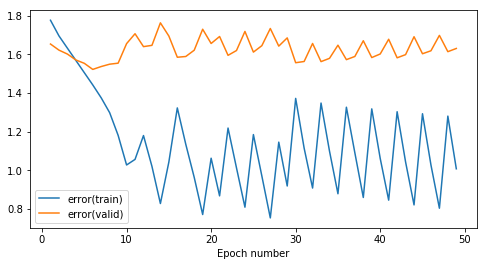

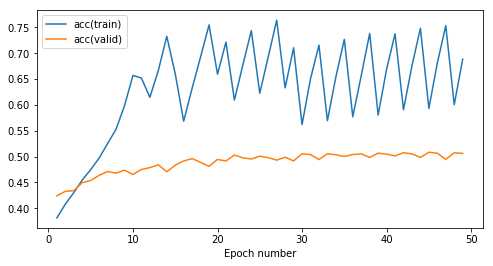

In [41]:
%%time

epochs = 50
minInputProb = 0.5
minHiddenProb = 0.1
resolution = 10
gamma = 0.6

#configuration above

maxProb = 1.

stepInputProb = (maxProb - minInputProb) / resolution
stepHiddenProb =  (maxProb - minHiddenProb) / resolution

curInputProb = 0.5
curHiddenProb = 0.5

#prevValidAccuracy = 0.
prevValidError = 10 #because we have rarely seen validation error larger than this value

with tf.Session(graph=graph, config=config) as sess:
    sess.run(init) #initialization to initialize all variables
    
    stats, keys = initStats()
    valid_error, valid_accuracy = 0., 0.

    for e in range(epochs):
        print "curInputProb: %.2f, curHiddenProb: %.2f" % (curInputProb, curHiddenProb)
        
        (train_error, train_accuracy), runTime = getRunTime(lambda _ = None : trainEpoch(
            e, train_data, train_step, error, accuracy, merge_dicts(
                {training: True}, constructProbs(keep_probs, curInputProb, curHiddenProb)
            )
        ))

        #print 'End epoch %02d (%.3f secs): err(train)=%.2f acc(train)=%.2f' % (e+1, runTime, train_error,train_accuracy)

        if (e + 1) % 1 == 0:
            valid_error, valid_accuracy = validateEpoch(e, valid_data, error, accuracy,
                                                        keep_probs, {training: False})

#             print((' ' * 27) + 'err(valid)={0:.2f} acc(valid)={1:.2f}'.format(valid_error, valid_accuracy))
#             print
            
            #if valid_accuracy >= prevValidAccuracy:
            if valid_error < prevValidError:
                #things are going better then reduce regularization
                curInputProb += stepInputProb
                curHiddenProb += stepHiddenProb
            else: #things are going worse so we better increase regularization
                curInputProb -= 2*stepInputProb
                curHiddenProb -= 2*stepHiddenProb
            
            #thresholding
            curInputProb = max(min(maxProb, curInputProb), minInputProb)
            curHiddenProb = max(min(maxProb, curHiddenProb), minHiddenProb)
            
            #update
            prevValidError = gamma * prevValidError + valid_error * (1 - gamma)

        gatherStats(e, train_error, train_accuracy, valid_error, valid_accuracy)
        
        print 'End epoch %02d (%.2f secs): err(train)=%.2f, acc(train)=%.3f, err(valid)=%.2f, acc(valid)=%.3f, ' %\
            (e+1, runTime, train_error, train_accuracy, valid_error, valid_accuracy)
        print "prevValidError: %.2f" % prevValidError
            
fig_1, ax_1, fig_2, ax_2 = plotStats(stats, keys, stats_interval=1)
figcount += 1
fig_1.savefig('cw3_part4_%02d_fig_error.svg' % figcount)
fig_2.savefig('cw3_part4_%02d_fig_valid.svg' % figcount)

#### Conclusion
Due to the varied dropout probability caused by our dynamic algorithm we can see that the validation error has remained constant, on average, for the 50 epochs without any trend of increase and the 50 epochs.

We can also see that the validation is on average slowly increasing until epoch ~30 and then remained still at ~50%. It peaked at 50.8% which is the largest value we have seen so far.

### L2 regularization
Will L2 regularization work on the MSD-10 classification task?

In [27]:
train_data = MSD10GenreDataProvider('train', batch_size=50, rng=rng) #((50,3000), (50,10))
valid_data = MSD10GenreDataProvider('valid', batch_size=50, rng=rng)

In [28]:
lamda2 = 1e-2

In [46]:
hidden_dims = np.linspace(1000, 25, 6).astype(int)

#tf.reset_default_graph() #kind of redundant statement
learningRate = 1e-3 #default of Adam is 1e-3

graph = tf.Graph() #create new graph

hidden_layers = []
regularizers = []
keep_probs = []

with graph.as_default():
    with tf.name_scope('data'):
        inputs = tf.placeholder(curDtype, [None, train_data.inputs.shape[1]], 'inputs')
        targets = tf.placeholder(curDtype, [None, train_data.num_classes], 'targets')
    
    with tf.name_scope('params'):
        training = tf.placeholder(tf.bool, name="training")
        
    
    with tf.name_scope('fullyConnected0'):
        curLayer, curRegularizer = fully_connected_layer_with_batch_norm_and_l2(0, inputs,
                                                  train_data.inputs.shape[1], hidden_dims[0],
                                                  nonlinearity= tf.nn.tanh,
                                                  w = modelVars[0][0], b = modelVars[0][1],
                                                  training=training,
                                                  lamda2 = lamda2)
        
        hidden_layers.append(curLayer)
        regularizers.append(curRegularizer)
    
    
    for i in range(1, len(hidden_dims)):        
        with tf.name_scope('fullyConnected%d' % i):
            curLayer, curRegularizer = fully_connected_layer_with_batch_norm_and_l2(i,
                                  hidden_layers[i-1],
                                  hidden_dims[i-1], hidden_dims[i],
                                  nonlinearity = tf.nn.tanh,
                                  w = modelVars[i][0], b = modelVars[i][1],
                                  training = training,
                                  lamda2 = lamda2)
            
            hidden_layers.append(curLayer)
            regularizers.append(curRegularizer)

    
    finalIndex = len(hidden_dims)

    with tf.name_scope('readout_output_layer'):
        outputs, curRegularizer = fully_connected_layer_with_batch_norm_and_l2(finalIndex, hidden_layers[-1],
                                        hidden_dims[-1], train_data.num_classes,
                                        training=training,
                                        nonlinearity=tf.identity,
                                        lamda2 = lamda2)
        
        regularizers.append(curRegularizer)

    with tf.name_scope('error'):
        error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
        
        for reg in regularizers:
            error += reg

    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(outputs, 1),
                                                   tf.argmax(targets, 1)), dtype=curDtype))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer(learning_rate=learningRate).minimize(error)

    init = tf.global_variables_initializer()
    
print hidden_dims

[1000  805  610  415  220   25]


In [29]:
hidden_dims = np.linspace(1000, 25, 6).astype(int)

#tf.reset_default_graph() #kind of redundant statement
learningRate = 1e-3 #default of Adam is 1e-3

graph = tf.Graph() #create new graph

hidden_layers = []
regularizers = []
keep_probs = []

with graph.as_default():
    with tf.name_scope('data'):
        inputs = tf.placeholder(curDtype, [None, train_data.inputs.shape[1]], 'inputs')
        targets = tf.placeholder(curDtype, [None, train_data.num_classes], 'targets')
    
    with tf.name_scope('params'):
        training = tf.placeholder(tf.bool, name="training")
        
    
    with tf.name_scope('fullyConnected0'):
        curLayer, curRegularizer = fully_connected_layer_with_batch_norm_and_l2(0, inputs,
                                                  train_data.inputs.shape[1], hidden_dims[0],
                                                  nonlinearity= tf.nn.tanh,
                                                  training=training,
                                                  lamda2 = lamda2)
        
        hidden_layers.append(curLayer)
        regularizers.append(curRegularizer)
    
    
    for i in range(1, len(hidden_dims)):        
        with tf.name_scope('fullyConnected%d' % i):
            curLayer, curRegularizer = fully_connected_layer_with_batch_norm_and_l2(i,
                                  hidden_layers[i-1],
                                  hidden_dims[i-1], hidden_dims[i],
                                  nonlinearity = tf.nn.tanh,
                                  training = training,
                                  lamda2 = lamda2)
            
            hidden_layers.append(curLayer)
            regularizers.append(curRegularizer)

    
    finalIndex = len(hidden_dims)

    with tf.name_scope('readout_output_layer'):
        outputs, curRegularizer = fully_connected_layer_with_batch_norm_and_l2(finalIndex, hidden_layers[-1],
                                        hidden_dims[-1], train_data.num_classes,
                                        training=training,
                                        nonlinearity=tf.identity,
                                        lamda2 = lamda2)
        
        regularizers.append(curRegularizer)

    with tf.name_scope('error'):
        error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
        
        for reg in regularizers:
            error += reg

    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(outputs, 1),
                                                   tf.argmax(targets, 1)), dtype=curDtype))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer(learning_rate=learningRate).minimize(error)

    init = tf.global_variables_initializer()
    
print hidden_dims

[1000  805  610  415  220   25]


In [30]:
show_graph(graph) #crashes if you have preloaded weights

End epoch 01 (42.27 secs): err(train)=4.48, acc(train)=0.356, err(valid)=2.30, acc(valid)=0.319, 
End epoch 02 (39.16 secs): err(train)=2.27, acc(train)=0.345, err(valid)=2.23, acc(valid)=0.351, 
End epoch 03 (38.90 secs): err(train)=2.24, acc(train)=0.347, err(valid)=2.28, acc(valid)=0.337, 
End epoch 04 (38.14 secs): err(train)=2.22, acc(train)=0.349, err(valid)=2.23, acc(valid)=0.338, 
End epoch 05 (38.99 secs): err(train)=2.18, acc(train)=0.351, err(valid)=2.15, acc(valid)=0.351, 
End epoch 06 (38.63 secs): err(train)=2.13, acc(train)=0.362, err(valid)=2.12, acc(valid)=0.351, 
End epoch 07 (39.00 secs): err(train)=2.08, acc(train)=0.368, err(valid)=2.09, acc(valid)=0.362, 
End epoch 08 (38.81 secs): err(train)=2.02, acc(train)=0.382, err(valid)=2.02, acc(valid)=0.374, 
End epoch 09 (38.11 secs): err(train)=1.97, acc(train)=0.399, err(valid)=1.96, acc(valid)=0.398, 
End epoch 10 (39.94 secs): err(train)=1.92, acc(train)=0.422, err(valid)=1.91, acc(valid)=0.422, 
End epoch 11 (38.17 

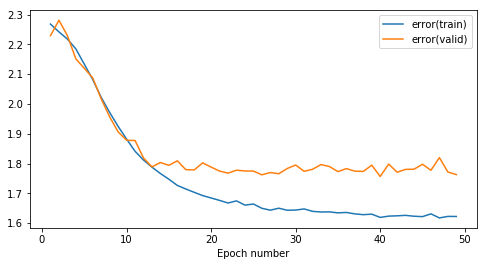

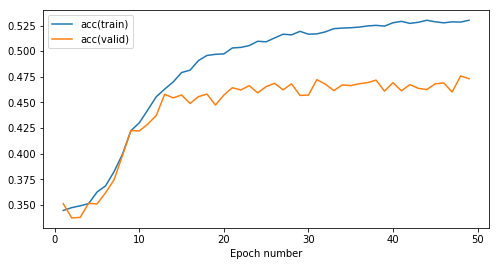

In [48]:
%%time

epochs = 50

with tf.Session(graph=graph, config=config) as sess:
    sess.run(init) #initialization to initialize all variables
    
    stats, keys = initStats()
    valid_error, valid_accuracy = 0., 0.

    for e in range(epochs):        
        (train_error, train_accuracy), runTime = getRunTime(lambda _ = None : trainEpoch(
            e, train_data, train_step, error, accuracy, {training: True}
        ))

        #print 'End epoch %02d (%.3f secs): err(train)=%.2f acc(train)=%.2f' % (e+1, runTime, train_error,train_accuracy)

        if (e + 1) % 1 == 0:
            valid_error, valid_accuracy = validateEpoch(e, valid_data, error, accuracy,
                                                        {training: False})
            
        gatherStats(e, train_error, train_accuracy, valid_error, valid_accuracy)
        
        print 'End epoch %02d (%.2f secs): err(train)=%.2f, acc(train)=%.3f, err(valid)=%.2f, acc(valid)=%.3f, ' %\
            (e+1, runTime, train_error, train_accuracy, valid_error, valid_accuracy)
            
fig_1, ax_1, fig_2, ax_2 = plotStats(stats, keys, stats_interval=1)
figcount += 1
fig_1.savefig('cw3_part4_l2_%02d_fig_error.svg' % figcount)
fig_2.savefig('cw3_part4_l2_%02d_fig_valid.svg' % figcount)

#### Conclusion
L2 regularization is successful when the lamda2 hyperparameter set to 1e-2.
It is noticable how the validation error is maintained within a certain region and the accuracy reaches to a steady value of 47%